# Sports and Outdoors Category - Data Exploration

**Category**: Sports and Outdoors  
**Team Member**: Denys Koval


## 1. Import Libraries


In [1]:
import os
from pathlib import Path
import warnings

import rootutils


rootutils.setup_root(Path.cwd(), indicator=".project-root", pythonpath=True)

ROOT_DIR = Path(os.environ.get("PROJECT_ROOT", Path.cwd()))
print(ROOT_DIR)

/Users/denys.koval/Labs/projects/amazon-reviews-analysis


In [2]:
import os
from pathlib import Path
import warnings
import pandas as pd

import rootutils


rootutils.setup_root(Path.cwd(), indicator=".project-root", pythonpath=True)

ROOT_DIR = Path(os.environ.get("PROJECT_ROOT", Path.cwd()))

REVIEWS_PATH = ROOT_DIR / "data/raw/review_categories/Sports_and_Outdoors.jsonl"
METADATA_PATH = ROOT_DIR / "data/raw/meta_categories/meta_Sports_and_Outdoors.jsonl"

warnings.filterwarnings("ignore")

## Initialize Spark


In [3]:
from src.amazon_reviews_analysis.utils import build_spark


spark = build_spark()

print("✓ Spark Session created successfully!")
print(f"Spark Version: {spark.version}")
print(f"Spark App Name: {spark.sparkContext.appName}")
print(f"Spark Master: {spark.sparkContext.master}")
print(f"Spark UI: {spark.sparkContext.uiWebUrl}")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/09 19:10:21 WARN Utils: Your hostname, LT-W-7826.local, resolves to a loopback address: 127.0.0.1; using 192.168.0.103 instead (on interface en0)
25/11/09 19:10:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/09 19:10:21 WARN Utils: Your hostname, LT-W-7826.local, resolves to a loopback address: 127.0.0.1; using 192.168.0.103 instead (on interface en0)
25/11/09 19:10:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use s

✓ Spark Session created successfully!
Spark Version: 4.0.1
Spark App Name: AmazonReviews
Spark Master: local[*]
Spark UI: http://192.168.0.103:4040


---

# PART A: METADATA

## Load Metadata


In [4]:
from src.amazon_reviews_analysis.utils import load_metadata


print(f"📂 Metadata: {METADATA_PATH}")

metadata_df = load_metadata(spark, METADATA_PATH)
print(f"Total records: {metadata_df.count():,}")

📂 Metadata: /Users/denys.koval/Labs/projects/amazon-reviews-analysis/data/raw/meta_categories/meta_Sports_and_Outdoors.jsonl


Total records: 1,587,421


## Schema & Structure


In [5]:
print("SCHEMA")
print("=" * 80)
metadata_df.printSchema()

print(f"\nColumns: {len(metadata_df.columns)}")
for idx, col_name in enumerate(metadata_df.columns, 1):
    print(f"{idx:2d}. {col_name}")

SCHEMA
root
 |-- author: struct (nullable = true)
 |    |-- about: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- avatar: string (nullable = true)
 |    |-- name: string (nullable = true)
 |-- average_rating: double (nullable = true)
 |-- bought_together: string (nullable = true)
 |-- categories: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- description: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- details: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- hi_res: string (nullable = true)
 |    |    |-- large: string (nullable = true)
 |    |    |-- thumb: string (nullable = true)
 |    |    |-- variant: string (nullable = true)
 |-- main_category: string (

## Sample Data


In [6]:
metadata_df.show(5, truncate=50)

+------+--------------+---------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+-----------------+-----------+-----+-------------+---------+--------+--------------------------------------------------+--------------------------------------------------+
|author|average_rating|bought_together|                                        categories|                                       description|                                           details|                                          features|                                            images|    main_category|parent_asin|price|rating_number|    store|subtitle|                                             title|                                            videos|
+------+--------------+---------------+-----------------------------

The table describes the range of products from Amazon (from the Sports and Outdoors category), including ratings, specifications, brands, images, etc.


---

# PART B: REVIEWS

## Load Reviews


In [7]:
from src.amazon_reviews_analysis.utils import load_reviews

print(f"📂 Reviews: {REVIEWS_PATH}")

reviews_df = load_reviews(spark, REVIEWS_PATH)
print(f"Total records: {reviews_df.count():,}")

📂 Reviews: /Users/denys.koval/Labs/projects/amazon-reviews-analysis/data/raw/review_categories/Sports_and_Outdoors.jsonl


Total records: 19,595,170


## Schema & Structure


In [8]:
print("SCHEMA")
print("=" * 80)
reviews_df.printSchema()

print(f"\nColumns: {len(reviews_df.columns)}")
for idx, col_name in enumerate(reviews_df.columns, 1):
    print(f"{idx:2d}. {col_name}")

SCHEMA
root
 |-- asin: string (nullable = true)
 |-- helpful_vote: long (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- attachment_type: string (nullable = true)
 |    |    |-- large_image_url: string (nullable = true)
 |    |    |-- medium_image_url: string (nullable = true)
 |    |    |-- small_image_url: string (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- text: string (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- title: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- verified_purchase: boolean (nullable = true)


Columns: 10
 1. asin
 2. helpful_vote
 3. images
 4. parent_asin
 5. rating
 6. text
 7. timestamp
 8. title
 9. user_id
10. verified_purchase


## Sample Data


In [9]:
reviews_df.show(5, truncate=50)

+----------+------------+------+-----------+------+--------------------------------------------------+-------------+------------------+----------------------------+-----------------+
|      asin|helpful_vote|images|parent_asin|rating|                                              text|    timestamp|             title|                     user_id|verified_purchase|
+----------+------------+------+-----------+------+--------------------------------------------------+-------------+------------------+----------------------------+-----------------+
|B07F3BDT8T|           8|    []| B0BGFR76CF|   5.0|Not gonna lie- they are not much to look at. Lo...|1677321053520|      Crazy comfy!|AFKZENTNBQ7A7V7UXW5JJI6UGRYQ|             true|
|B00NXQLFQQ|           0|    []| B00NXQLFQQ|   5.0|                                I love it. Pretty!|1523093771676|        Excellent!|AFKZENTNBQ7A7V7UXW5JJI6UGRYQ|             true|
|B08SVPR266|           0|    []| B0957WLR63|   5.0|Huge fan of B Vertigo and this dre

The table contains information about user experiences, ratings, and comments about products. This data can be used to analyze sentiment, identify popular products, and correlate ratings with review text.


# DATA EXPLORATION


### MISSING VALUES


In [10]:
from pyspark.sql.functions import col, sum, when, size

print("=== METADATA: Missing Values Analysis ===")
total_meta = metadata_df.count()

# % missed data in each column
nulls = metadata_df.select(
    [(sum(when(col(c).isNull(), 1).otherwise(0)) / total_meta).alias(c) for c in metadata_df.columns]
)

nulls.show()

metadata_df.select(
    [
        (sum(when(size(col(c)) == 0, 1).otherwise(0)) / total_meta).alias(f"{c}_empty")
        for c in ["categories", "images", "description", "features"]
    ]
).show()

=== METADATA: Missing Values Analysis ===


+------------------+--------------+---------------+----------+-----------+-------+--------+------+-------------------+-----------+------------------+-------------+--------------------+-----------------+-----+------+
|            author|average_rating|bought_together|categories|description|details|features|images|      main_category|parent_asin|             price|rating_number|               store|         subtitle|title|videos|
+------------------+--------------+---------------+----------+-----------+-------+--------+------+-------------------+-----------+------------------+-------------+--------------------+-----------------+-----+------+
|0.9999653526065234|           0.0|            1.0|       0.0|        0.0|    0.0|     0.0|   0.0|0.15745917434631393|        0.0|0.6942619506734509|          0.0|0.022117006137628265|0.999431782746984|  0.0|   0.0|
+------------------+--------------+---------------+----------+-----------+-------+--------+------+-------------------+-----------+------

+--------------------+--------------------+-------------------+------------------+
|    categories_empty|        images_empty|  description_empty|    features_empty|
+--------------------+--------------------+-------------------+------------------+
|0.056588642836399417|3.401744086792350...|0.34836505249710065|0.1691907817774869|
+--------------------+--------------------+-------------------+------------------+



METADATA: metadata_df table has a significant number of gaps, especially in author, bought_together columns.


In [11]:
print("=== REVIEWS: Missing Values Analysis ===")

total_reviews = reviews_df.count()

nulls = reviews_df.select(
    [(sum(when(col(c).isNull(), 1).otherwise(0)) / total_reviews).alias(c) for c in reviews_df.columns]
)
nulls.show()

=== REVIEWS: Missing Values Analysis ===


+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+
|asin|helpful_vote|images|parent_asin|rating|text|timestamp|title|user_id|verified_purchase|
+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+
| 0.0|         0.0|   0.0|        0.0|   0.0| 0.0|      0.0|  0.0|    0.0|              0.0|
+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+



REVIEWS: reviews_df has high data quality — all fields are filled in. This means the data can be used for further analysis without any problems.


### BASIC STATISTICS


In [12]:
metadata_df.describe().show()

25/11/09 19:11:09 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+---------------+--------------+-------------------+-----------------+------------------+--------------------+--------------------+--------------------+
|summary|    average_rating|bought_together| main_category|        parent_asin|            price|     rating_number|               store|            subtitle|               title|
+-------+------------------+---------------+--------------+-------------------+-----------------+------------------+--------------------+--------------------+--------------------+
|  count|           1587421|              0|       1337467|            1587421|           485335|           1587421|             1552312|                 902|             1587421|
|   mean| 4.192648453056965|           NULL|          NULL|3.999826629882143E9|57.36083746251171|104.55058676935734|            Infinity|                NULL|4.117284075540919E11|
| stddev|0.7661105865699659|           NULL|          NULL|3.486060556572441E9|162.0413151908397| 68

METADATA: metadata_df shows that the products are mostly positively rated, but the spread in prices and number of ratings is large.
The price ranges indicate the presence of both budget and premium brands.


In [13]:
reviews_df.describe().show()

+-------+-------------------+------------------+--------------------+------------------+-------------------+--------------------+------------------+--------------------+
|summary|               asin|      helpful_vote|         parent_asin|            rating|               text|           timestamp|             title|             user_id|
+-------+-------------------+------------------+--------------------+------------------+-------------------+--------------------+------------------+--------------------+
|  count|           19595170|          19595170|            19595170|          19595170|           19595170|            19595170|          19595170|            19595170|
|   mean|5.521802085260574E9|1.0446072169825524| 5.754272421833033E9| 4.218416834352547|1.07699748941929E11|1.542144400805990...|               NaN|                NULL|
| stddev|2.783464133635637E9|14.900531082550334|2.6877519512421894E9|1.3101976501344963|3.17963304887266E12|  9.1428989141786E10|               NaN|  

REVIEWS: Most users leave positive reviews, but there are a number of low ratings. The review texts are of varying lengths, sometimes even emojis.


### EXPLORATION OF SOME COLUMNS


In [14]:
reviews_df.groupBy("rating").count().orderBy("rating").show()

+------+--------+
|rating|   count|
+------+--------+
|   1.0| 1836990|
|   2.0|  933101|
|   3.0| 1324911|
|   4.0| 2518170|
|   5.0|12981998|
+------+--------+



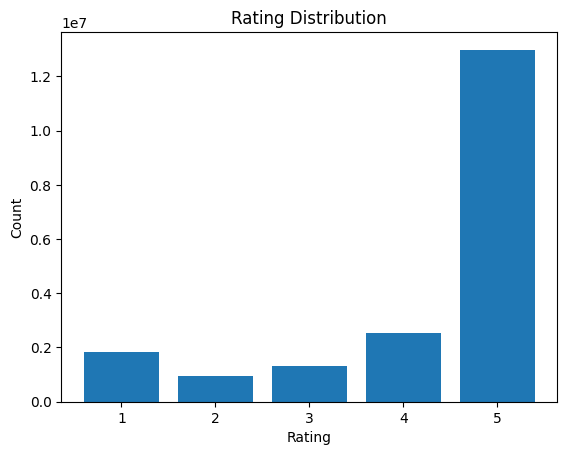

In [15]:
rating_counts = reviews_df.groupBy("rating").count().orderBy("rating")

pdf = rating_counts.toPandas()

import matplotlib.pyplot as plt

plt.figure()
plt.bar(pdf["rating"], pdf["count"])
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [16]:
reviews_df.agg({"rating": "avg"}).show()

+-----------------+
|      avg(rating)|
+-----------------+
|4.218416834352547|
+-----------------+



Most users give the highest rating — 5.0.

This indicates either general user satisfaction or a bias in ratings (people are more likely to leave reviews when they are very satisfied).

The fewest reviews have a rating of 2.0. Low ratings are less common, which is also a typical effect — dissatisfied users sometimes do not leave a review.

The distribution is asymmetric — clearly biased towards high ratings.


In [17]:
reviews_df.groupBy("verified_purchase").count().show()

+-----------------+--------+
|verified_purchase|   count|
+-----------------+--------+
|             true|18241609|
|            false| 1353561|
+-----------------+--------+



Most reviews (≈90%) are verified by purchase, i.e. left by users who actually purchased the product.

Only about 10% are unverified, which could mean:

1. the user left the review without purchasing through another platform;

2. or potentially less reliable reviews (bots, advertising, subjective opinions).


In [18]:
from pyspark.sql.functions import length

reviews_df.select(length("text").alias("text_length")).describe().show()  # description of review text lengths

+-------+------------------+
|summary|       text_length|
+-------+------------------+
|  count|          19595170|
|   mean|196.08622686100708|
| stddev|297.84014195610956|
|    min|                 0|
|    max|             30035|
+-------+------------------+



Average length ~196 characters → most users leave short, concise comments

Large standard deviation (~297) → text length varies greatly - there are both very short and extremely long reviews.


In [19]:
reviews_df.groupBy("user_id", "asin", "timestamp").count().orderBy("count", ascending=False).show(
    5
)  # potential duplicate or suspicious entries

+--------------------+----------+-------------+-----+
|             user_id|      asin|    timestamp|count|
+--------------------+----------+-------------+-----+
|AGPUR5LWDFDRTABDA...|B09QM9HHVX|1667594409206|   15|
|AG4RU5ZBI3MFO4FAF...|B0837F4S2F|1612714392855|   11|
|AGXHAC5UMXLJOYKP4...|B084P5C74R|1651735273688|   11|
|AGD3ZC6AS3SSWQ3XW...|B00APPHYH2|1422167872000|   11|
|AGXHAC5UMXLJOYKP4...|B084J5LSWY|1651735116338|   11|
+--------------------+----------+-------------+-----+
only showing top 5 rows


The same user left several (up to 10) identical entries about the same product at the same time.


In [20]:
from pyspark.sql.functions import count

duplicates = reviews_df.groupBy("user_id", "asin", "timestamp").count().filter("count > 1")
print(duplicates.count())

181193


In [21]:
from pyspark.sql.functions import approx_count_distinct

reviews_df.select(
    approx_count_distinct("asin").alias("unique_products"), approx_count_distinct("user_id").alias("unique_users")
).show()

+---------------+------------+
|unique_products|unique_users|
+---------------+------------+
|        2301453|    10344416|
+---------------+------------+



If we compare it to the total number of reviews, we can conclude that on average one user leaves multiple reviews, and there are several reviews per product.


In [22]:
print("=== Price Analysis ===")

from pyspark.sql.functions import when, regexp_replace

metadata_with_price = (
    metadata_df.filter(col("price").isNotNull())
    .withColumn("price_clean", regexp_replace(col("price"), r"[^\d\.]", ""))
    .filter(col("price_clean") != "")
    .withColumn("price_numeric", col("price_clean").cast("double"))
    .filter(col("price_numeric").isNotNull())
)

metadata_with_price.select("price", "price_clean", "price_numeric", "title", "average_rating").orderBy(
    "price_numeric", ascending=False
).show(10, truncate=50)

price_ranges = (
    metadata_with_price.withColumn(
        "price_range",
        when(col("price_numeric") < 10, "Budget (<$10)")
        .when(col("price_numeric") < 25, "Mid ($10-25)")
        .when(col("price_numeric") < 50, "Premium ($25-50)")
        .otherwise("Luxury (>$50)"),
    )
    .groupBy("price_range")
    .count()
    .orderBy("count", ascending=False)
)

price_ranges.show()

=== Price Analysis ===


+--------+-----------+-------------+--------------------------------------------------+--------------+
|   price|price_clean|price_numeric|                                             title|average_rating|
+--------+-----------+-------------+--------------------------------------------------+--------------+
|21999.98|   21999.98|     21999.98|MP Tactical Bunker Package - 20 Man Deluxe (MP-...|           5.0|
|17514.15|   17514.15|     17514.15|                              YANDINA Combiner 100|           3.5|
|12281.15|   12281.15|     12281.15|Wooden Boat USA Old Modern Handicrafts Real Whi...|           5.0|
|11587.89|   11587.89|     11587.89|WOCOYO Bike Road Bikes Racing Bicycle Foldable ...|           5.0|
|11129.99|   11129.99|     11129.99|XBSLJ Foldable Rowing Machines Compact Rowing M...|           1.0|
| 9328.22|    9328.22|      9328.22|ZLXDP Carbon Cues 3 Cushion Carbon Fiber Cues 1...|           1.0|
| 7999.99|    7999.99|      7999.99|                         Woodway Desm

+----------------+------+
|     price_range| count|
+----------------+------+
|    Mid ($10-25)|176034|
|   Luxury (>$50)|114433|
|Premium ($25-50)|113316|
|   Budget (<$10)| 80806|
+----------------+------+



The data covers a very wide price range, from budget to luxury goods.

The most popular price segment ($10 - $25) is the majority of mid-range products.

A significant proportion of cheap goods.

Luxury goods are rare, but present in the sample.


In [23]:
metadata_with_price_corr = (
    metadata_df.filter(col("price").isNotNull())
    .withColumn("price_clean", regexp_replace(col("price"), r"[^\d\.]", ""))
    .filter(col("price_clean") != "")
    .withColumn("price_numeric", col("price_clean").cast("double"))
    .filter(col("price_numeric").isNotNull())
)

numeric_cols = ["average_rating", "rating_number", "price_numeric"]
num_pdf = metadata_with_price_corr.select(numeric_cols).toPandas()

corr = num_pdf.corr()
corr

,average_rating,rating_number,price_numeric
average_rating,1.000000,0.051130,-0.007306
rating_number,0.051130,1.000000,-0.015702
price_numeric,-0.007306,-0.015702,1.000000


The average rating is almost independent of price and number of reviews.

The conclusions of the previous analysis on price_range are confirmed: more expensive products receive slightly better ratings, but the overall dependence is weak.


## CONCLUSIONS

### Data quality and completeness

1. There are many missing or empty values ​​in metadata_df.

2. There are no missing values ​​in reviews_df, the data is more structured and complete.

### Basic statistics on goods

1. Average product rating: varies by category

2. Price ranges from budget to premium items

3. main_category — Sports and Outdoors

4. Data covers a wide range of prices and ratings.

### Reviews analysis

1. Most reviews are 5 stars, many are positive, fewer are negative (1–2 stars).

2. Verified purchase: ~90% confirmed by purchase → most reviews are reliable.

3. Text length: average varies, high variability, there are short and extremely long reviews.

4. Repeated entries by the same user for the same product at the same time were detected → duplicate entries need to be cleaned.

5. Reviews are generally reliable, positive, but there are anomalies (repeated entries, empty texts) that should be removed before in-depth analysis.

### Price analysis

1. More expensive products receive slightly higher ratings, but the overall relationship is weak.

2. The bulk of products are budget and mid-range.

3. The correlation between price and rating is almost zero → price is not a strong factor for evaluation.


# DATA PREPARATION


In [24]:
print("DATA CLEANING - REVIEWS")

print("\n1. Checking for duplicates...")
print(f"Original count: {reviews_df.count():,}")

duplicates = (
    reviews_df.groupBy("user_id", "asin", "timestamp").count().filter(col("count") > 1).orderBy(col("count").desc())
)

print(f"Duplicate groups found: {duplicates.count():,}")

DATA CLEANING - REVIEWS

1. Checking for duplicates...


Original count: 19,595,170


Duplicate groups found: 181,193


In [25]:
from pyspark.sql.functions import col, row_number
from pyspark.sql.window import Window

window_spec = Window.partitionBy("user_id", "asin", "timestamp").orderBy("rating")

reviews_cleaned = (
    reviews_df.withColumn("row_num", row_number().over(window_spec)).filter(col("row_num") == 1).drop("row_num")
)

print(f"\nAfter removing duplicates: {reviews_cleaned.count():,}")


After removing duplicates: 19,380,047


In [26]:
from pyspark.sql.functions import col, length, trim

print("Checking for empty/invalid reviews...")

empty_text = reviews_cleaned.filter((col("text").isNull()) | (length(trim(col("text"))) == 0)).count()

print(f"Reviews with empty text: {empty_text:,}")


reviews_cleaned = reviews_cleaned.filter((col("text").isNotNull()) & (length(trim(col("text"))) > 0))

print(f"After removing empty texts: {reviews_cleaned.count():,}")

Checking for empty/invalid reviews...


Reviews with empty text: 17,734


After removing empty texts: 19,362,313


In [27]:
print("\nChecking rating validity...")

invalid_ratings = reviews_cleaned.filter((col("rating") < 1.0) | (col("rating") > 5.0)).count()

print(f"Invalid ratings (outside 1-5 range): {invalid_ratings}")


Checking rating validity...


Invalid ratings (outside 1-5 range): 0


In [28]:
print("DATA CLEANING - METADATA")

print("\nChecking metadata duplicates...")
print(f"Original count: {metadata_df.count():,}")

metadata_cleaned = metadata_df.dropDuplicates(["parent_asin"])

print(f"After removing duplicates: {metadata_cleaned.count():,}")
print(f"Removed: {metadata_df.count() - metadata_cleaned.count():,} duplicates")

DATA CLEANING - METADATA

Checking metadata duplicates...


Original count: 1,587,421


After removing duplicates: 1,587,421


Removed: 0 duplicates


In [29]:
print("\nChecking products without title...")

no_title = metadata_cleaned.filter((col("title").isNull()) | (length(trim(col("title"))) == 0)).count()

print(f"Products without title: {no_title}")


Checking products without title...


Products without title: 112


In [30]:
metadata_cleaned = metadata_cleaned.filter((col("title").isNotNull()) & (length(trim(col("title"))) > 0))

In [31]:
print("\nChecking price anomalies...")

price_anomalies = metadata_cleaned.filter(col("price").isNotNull()).select("price", "title").orderBy("price")

price_anomalies.show(10, truncate=50)


Checking price anomalies...


+-----+--------------------------------------------------+
|price|                                             title|
+-----+--------------------------------------------------+
|  0.0|The Ultimate Kansas City Chiefs Trivia Book: A ...|
|  0.0|The Super '70s: Memories from Pro Football's Gr...|
|  0.0|                    Caught Fire: A John Seal Novel|
|  0.0|                     Dom of Las Vegas (Sin City 1)|
| 0.01|YSLMNOR Tie Dye Tank Tops for Womens Plus Size ...|
| 0.01|Shan-S Case for Garmin Forerunner 245/245M,Ultr...|
| 0.01|Luxury and Shining Exquisite Women's Two Tone S...|
| 0.01|wpOP59NE Punk Nose Ring Sparkly Rhinestones U S...|
| 0.01|SXFSE Womens Luxury Rings, Fashion New Physical...|
| 0.01|Gaweb Digital Pedometer, Multi-Functional Batte...|
+-----+--------------------------------------------------+
only showing top 10 rows


In [32]:
print("\nChecking invalid average ratings in metadata...")

invalid_avg = metadata_cleaned.filter((col("average_rating") < 0) | (col("average_rating") > 5)).count()

print(f"Invalid average ratings: {invalid_avg}")


Checking invalid average ratings in metadata...


Invalid average ratings: 0


In [33]:
print("SAVING CLEANED DATA")

CLEANED_REVIEWS_PATH = ROOT_DIR / "data/cleaned/review_categories/sports_and_outdoors_reviews_cleaned.parquet"
CLEANED_METADATA_PATH = ROOT_DIR / "data/cleaned/meta_categories/sports_and_outdoors_metadata_cleaned.parquet"

# Create directories if they don't exist
CLEANED_REVIEWS_PATH.parent.mkdir(parents=True, exist_ok=True)
CLEANED_METADATA_PATH.parent.mkdir(parents=True, exist_ok=True)

print(f"Saving reviews to: {CLEANED_REVIEWS_PATH}")
reviews_cleaned.coalesce(1).write.mode("overwrite").parquet(str(CLEANED_REVIEWS_PATH))
print("✓ Reviews saved successfully")

print(f"Saving metadata to: {CLEANED_METADATA_PATH}")
metadata_cleaned.coalesce(1).write.mode("overwrite").parquet(str(CLEANED_METADATA_PATH))
print("✓ Metadata saved successfully")

print("\nFINAL STATISTICS:")
print(f"Reviews: {reviews_df.count():,} → {reviews_cleaned.count():,}")
print(f"Metadata: {metadata_df.count():,} → {metadata_cleaned.count():,}")
print(
    f"Total records removed: {(reviews_df.count() - reviews_cleaned.count()) + (metadata_df.count() - metadata_cleaned.count()):,}"
)

SAVING CLEANED DATA
Saving reviews to: /Users/denys.koval/Labs/projects/amazon-reviews-analysis/data/cleaned/review_categories/sports_and_outdoors_reviews_cleaned.parquet


✓ Reviews saved successfully
Saving metadata to: /Users/denys.koval/Labs/projects/amazon-reviews-analysis/data/cleaned/meta_categories/sports_and_outdoors_metadata_cleaned.parquet


✓ Metadata saved successfully

FINAL STATISTICS:


Reviews: 19,595,170 → 19,362,313


Metadata: 1,587,421 → 1,587,309


Total records removed: 232,969
